# Final Portfolio Project 2026: Classification Task

## 1. Dataset Description

### **Dataset Name**: Online Shoppers Purchasing Intention Dataset

### **Source & Creator**
- **Creators**:
    1. C. Okan Sakar (Bahcesehir University, Turkey)
    2. Yomi Kastro (Inveon Information Technologies Consultancy and Trade, Turkey)
- **Source**: UCI Machine Learning Repository.

### **UNSDG Alignment**
This project aligns with **UNSDG Goal 8: Decent Work and Economic Growth**. By analyzing online shopping behaviors and predicting purchasing intentions, businesses can optimize their platforms to improve user experience and conversion rates. This fosters economic growth through increased efficiency and sales, while potentially creating data-driven jobs in the e-commerce sector.

### **Features**
- `Administrative`, `Administrative_Duration`: Number of administrative pages visited and time spent.
- `Informational`, `Informational_Duration`: Number of informational pages visited and time spent.
- `ProductRelated`, `ProductRelated_Duration`: Number of product-related pages visited and time spent.
- `BounceRates`: Percentage of visitors who enter the site and then leave ("bounce") rather than continuing to view other pages.
- `ExitRates`: All page views to the page, the percentage that were the last in the session.
- `PageValues`: Average value for a web page that a user visited before completing an e-commerce transaction.
- `SpecialDay`: Closeness of the site visiting time to a specific special day (e.g., Mother’s Day, Valentine's Day).
- `Month`: Month of the year.
- `OperatingSystems`, `Browser`, `Region`, `TrafficType`: Categorical technical/demographic features.
- `VisitorType`: 'Returning_Visitor', 'New_Visitor', etc.
- `Weekend`: Boolean indicating if the visit was on a weekend.
- `Revenue`: **Target Variable**. Boolean indicating if the visit resulted in a purchase (True/False).

### **Research Questions**
1. **Conversion Prediction**: What features are the strongest predictors of whether a user will make a purchase (Revenue)?
2. **Engagement vs. Sales**: Does spending more time on product-related pages significantly increase the likelihood of a purchase?
3. **Visitor Behavior**: How does the behavior of return visitors differ from new visitors regarding purchase conversion?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [ ]:
# Load Dataset
try:
    df = pd.read_csv('online_shoppers_intention.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please ensure 'online_shoppers_intention.csv' is in the notebook directory.")

# Initial Inspect
df.head()

Dataset loaded successfully.


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 2. Data Cleaning & Preprocessing

We will clean and prepare the data for classification.

In [ ]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())

# Check duplicates
print("\nDuplicates:", df.duplicated().sum())

# Remove duplicates if any (though duplicates might be valid visits, exact duplicates are often data errors)
df = df.drop_duplicates()

Missing Values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Duplicates: 125


In [ ]:
# Encode Categorical Variables
# Month, VisitorType, Weekend need encoding.

le = LabelEncoder()
df['Month_Encoded'] = le.fit_transform(df['Month'])
df['VisitorType_Encoded'] = le.fit_transform(df['VisitorType'])
df['Weekend_Encoded'] = le.fit_transform(df['Weekend'].astype(str))
df['Revenue_Encoded'] = le.fit_transform(df['Revenue'].astype(str))

print("Encoding complete.")

Encoding complete.


## 3. Exploratory Data Analysis (EDA)

Visualizing distributions and relationships.

/tmp/ipython-input-4256238197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=df, palette='pastel')


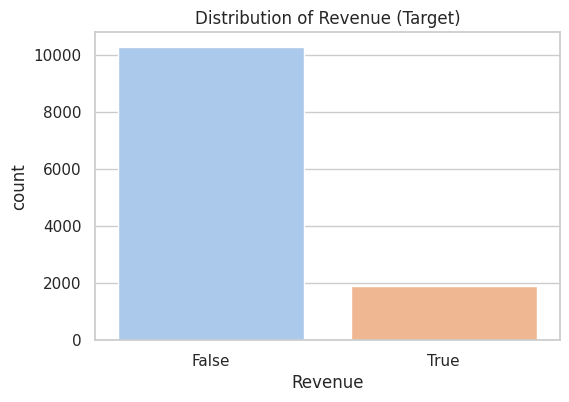

In [ ]:
# 1. Target Class Distribution (Revenue)
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=df, palette='pastel')
plt.title('Distribution of Revenue (Target)')
plt.show()

**Insight**: The dataset is imbalanced. Most visits result in False (No Purchase).

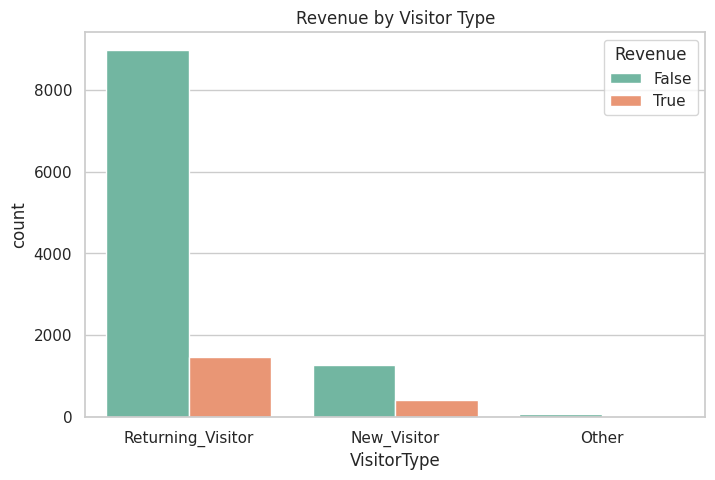

In [ ]:
# 2. VisitorType vs Revenue
plt.figure(figsize=(8, 5))
sns.countplot(x='VisitorType', hue='Revenue', data=df, palette='Set2')
plt.title('Revenue by Visitor Type')
plt.show()

**Insight**: Returning visitors are the largest group, but new visitors also have a notable conversion rate.

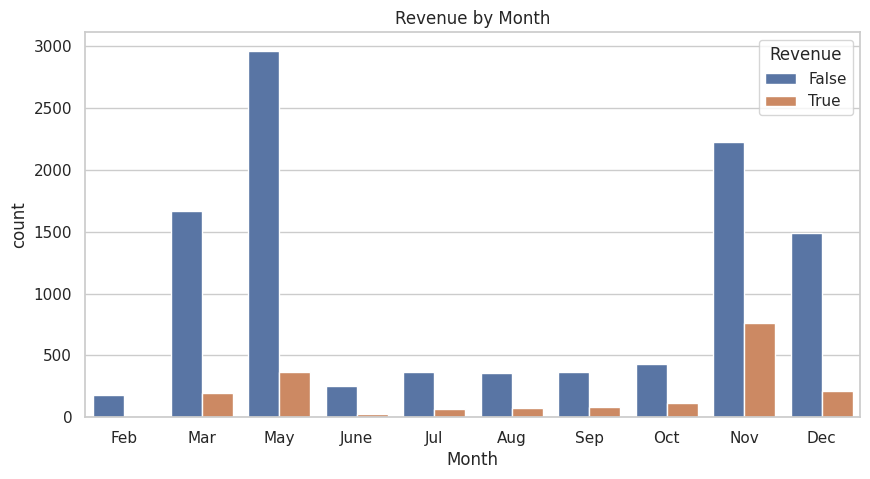

In [ ]:
# 3. Month vs Revenue
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', hue='Revenue', data=df, order=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Revenue by Month')
plt.show()

**Insight**: November seems to have high activity, possibly due to Black Friday/Holiday seasonality.

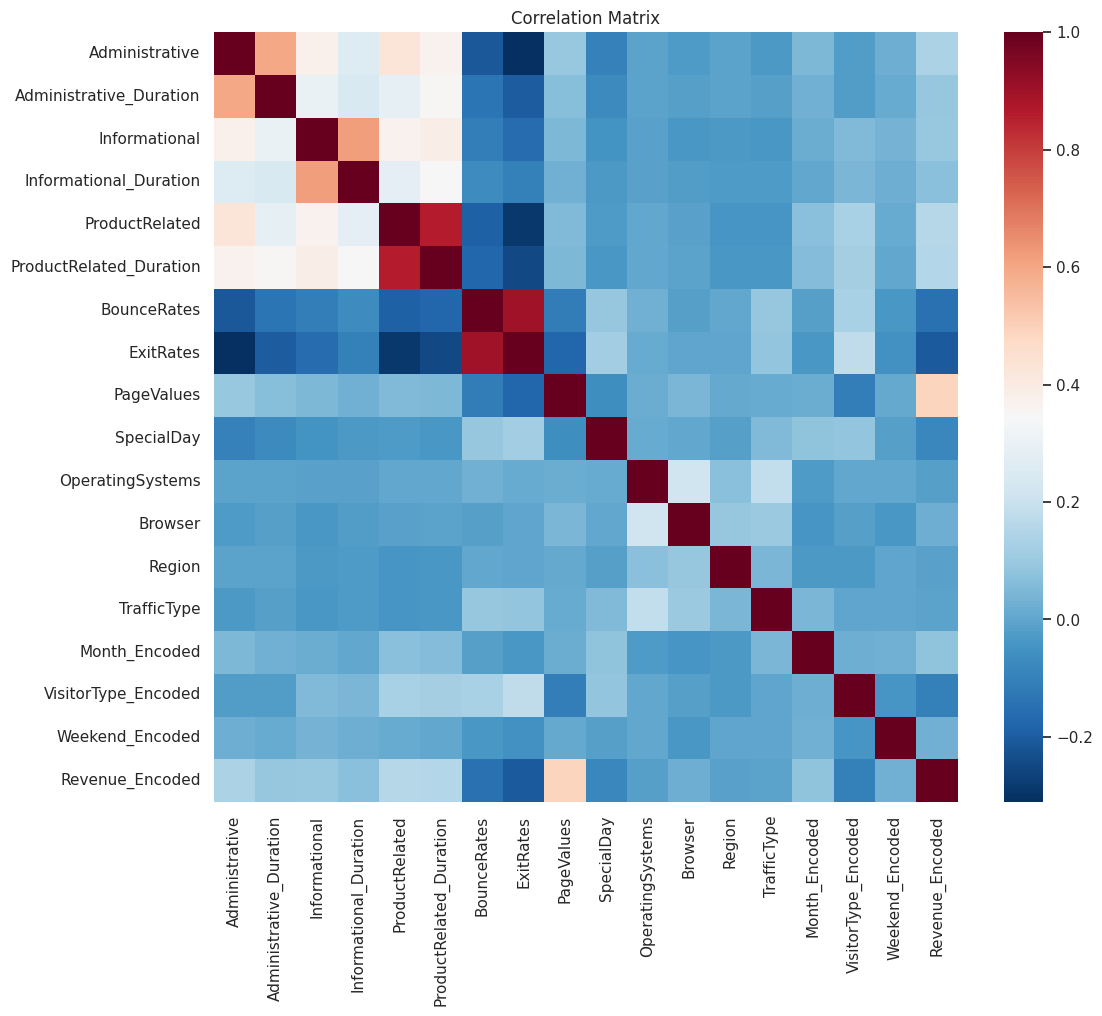

In [ ]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, cmap='RdBu_r', annot=False)
plt.title('Correlation Matrix')
plt.show()

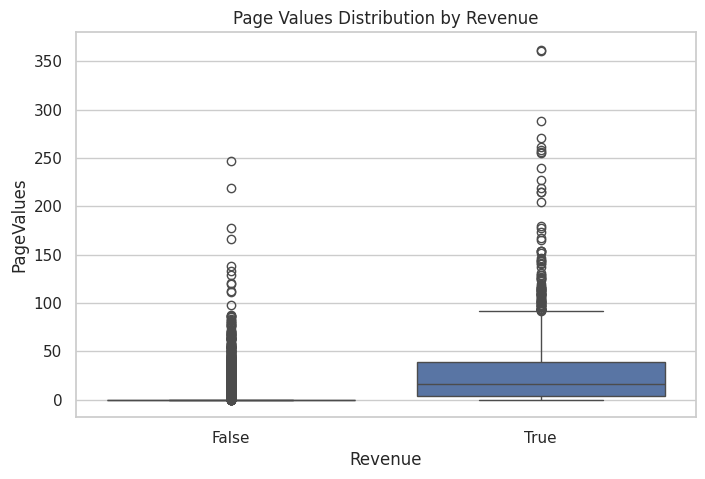

In [ ]:
# 5. PageValues vs Revenue
plt.figure(figsize=(8, 5))
sns.boxplot(x='Revenue', y='PageValues', data=df)
plt.title('Page Values Distribution by Revenue')
plt.show()

**Insight**: PageValues is significantly higher for sessions that result in a purchase.

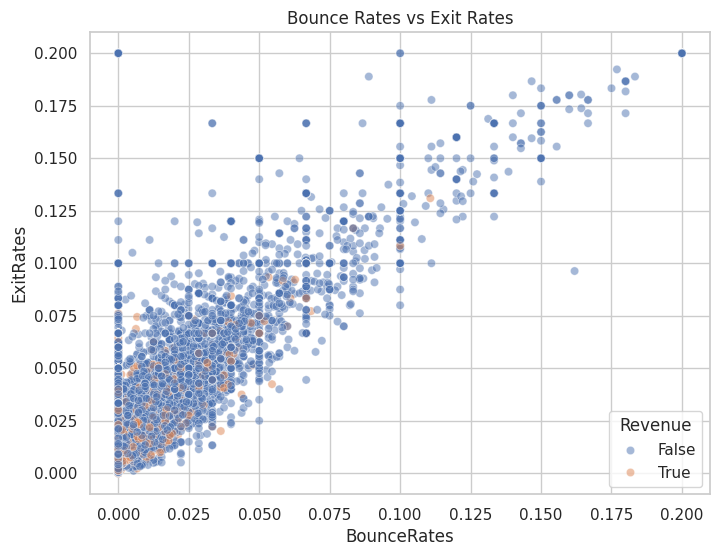

In [ ]:
# 6. Bounce Rates vs Exit Rates
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BounceRates', y='ExitRates', hue='Revenue', data=df, alpha=0.5)
plt.title('Bounce Rates vs Exit Rates')
plt.show()

**Insight**: High bounce/exit rates correlate with no purchase.

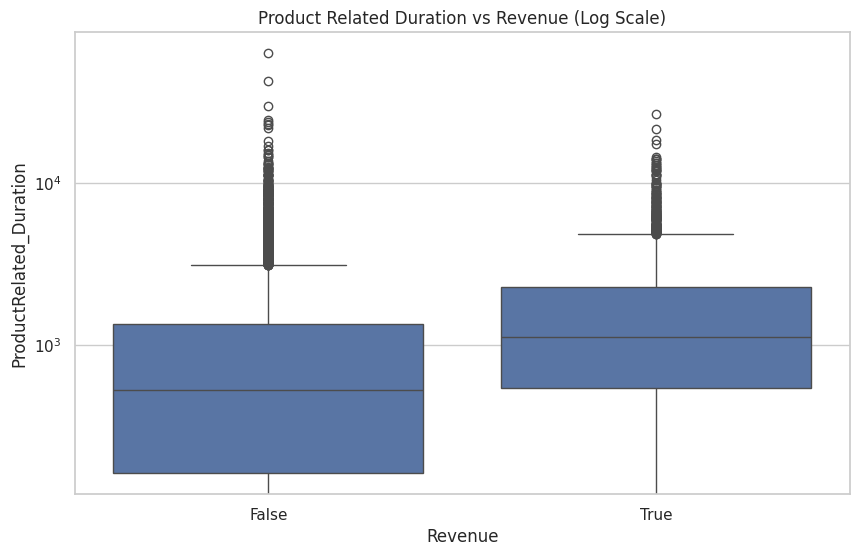

In [ ]:
# 7. Product Related Duration vs Revenue
# Using log scale for better visibility due to outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df)
plt.yscale('log')
plt.title('Product Related Duration vs Revenue (Log Scale)')
plt.show()

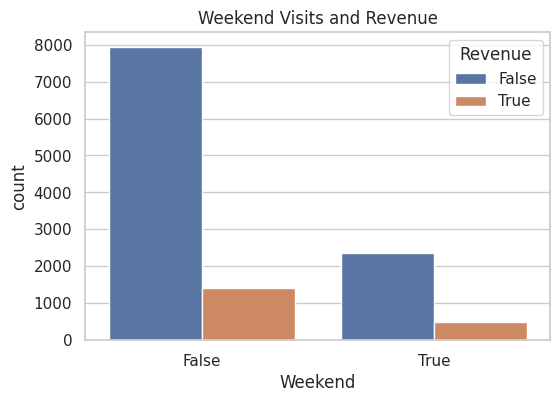

In [ ]:
# 8. Weekend vs Revenue
plt.figure(figsize=(6, 4))
sns.countplot(x='Weekend', hue='Revenue', data=df)
plt.title('Weekend Visits and Revenue')
plt.show()

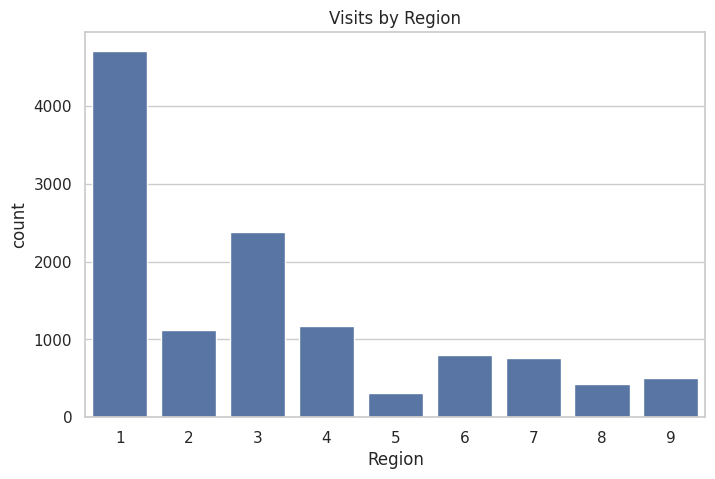

In [ ]:
# 9. Region Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=df)
plt.title('Visits by Region')
plt.show()

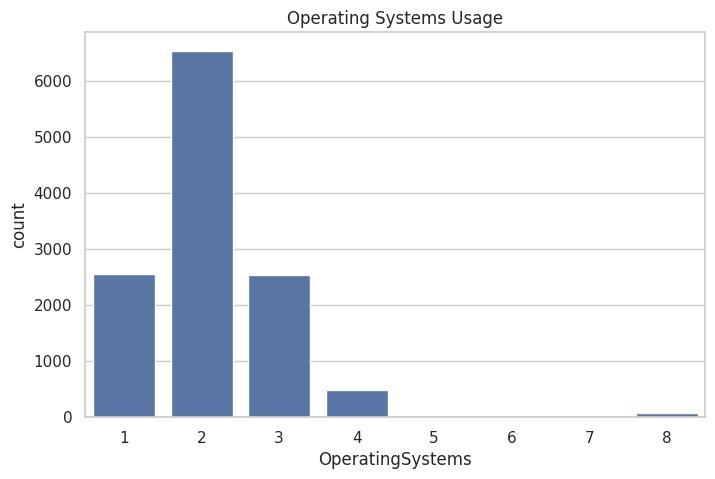

In [ ]:
# 10. Operating Systems
plt.figure(figsize=(8, 5))
sns.countplot(x='OperatingSystems', data=df)
plt.title('Operating Systems Usage')
plt.show()

In [ ]:
# 11. ROC Curve (to be generated after modeling, but placeholding here or below)
# Note: ROC curve strictly requires model predictions, so we will plot it in section 4.


## 4. Build Classification Models

Target: **Revenue**
Features: All other relevant columns.

In [ ]:
# Feature Selection (Dropping original categorical columns and Target)
features = ['Administrative', 'Administrative_Duration', 'Informational',
            'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
            'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Encoded',
            'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType_Encoded', 'Weekend_Encoded']

X = df[features]
y = df['Revenue_Encoded']

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Training Set shape:", X_train.shape)
print("Test Set shape:", X_test.shape)

Training Set shape: (8543, 17)
Test Set shape: (3662, 17)


In [ ]:
# Evaluation Function
def evaluate_classifier(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return f1

In [ ]:
# 1. Logistic Regression
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
evaluate_classifier(lr_clf, X_test, y_test, "Logistic Regression")

--- Logistic Regression ---
Accuracy: 0.8878
Precision: 0.7455
Recall: 0.3755
F1 Score: 0.4994

Confusion Matrix:
 [[3046   70]
 [ 341  205]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      3116
           1       0.75      0.38      0.50       546

    accuracy                           0.89      3662
   macro avg       0.82      0.68      0.72      3662
weighted avg       0.88      0.89      0.87      3662



0.4993909866017052

In [ ]:
# 2. Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate_classifier(rf_clf, X_test, y_test, "Random Forest Classifier")

--- Random Forest Classifier ---
Accuracy: 0.9088
Precision: 0.7524
Recall: 0.5788
F1 Score: 0.6542

Confusion Matrix:
 [[3012  104]
 [ 230  316]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      3116
           1       0.75      0.58      0.65       546

    accuracy                           0.91      3662
   macro avg       0.84      0.77      0.80      3662
weighted avg       0.90      0.91      0.90      3662



0.6542443064182195

In [ ]:
# 3. MLP Classifier (Neural Network)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_clf.fit(X_train, y_train)
evaluate_classifier(mlp_clf, X_test, y_test, "MLP Classifier")

--- MLP Classifier ---
Accuracy: 0.8949
Precision: 0.6731
Recall: 0.5733
F1 Score: 0.6192

Confusion Matrix:
 [[2964  152]
 [ 233  313]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3116
           1       0.67      0.57      0.62       546

    accuracy                           0.89      3662
   macro avg       0.80      0.76      0.78      3662
weighted avg       0.89      0.89      0.89      3662



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.619188921859545

## 5. Hyperparameter Tuning

Tuning Logistic Regression and Random Forest.

In [ ]:
# Tuning Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3)
rf_search.fit(X_train, y_train)

print("Best RF Params:", rf_search.best_params_)

Best RF Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Tuning Logistic Regression
lr_params = {'C': [0.1, 1, 10]}
lr_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_params, cv=3)
lr_search.fit(X_train, y_train)

print("Best LR Params:", lr_search.best_params_)

Best LR Params: {'C': 1}


## 6. Feature Selection

Using SelectKBest.

In [ ]:
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

scores = pd.DataFrame({'Feature': features, 'Score': selector.scores_})
print(scores.sort_values(by='Score', ascending=False))

                    Feature        Score
8                PageValues  2645.615180
7                 ExitRates   373.238283
5   ProductRelated_Duration   216.998168
4            ProductRelated   216.154410
6               BounceRates   188.763940
0            Administrative   166.620606
15      VisitorType_Encoded    91.728719
2             Informational    82.898062
1   Administrative_Duration    76.757192
9                SpecialDay    62.689806
10            Month_Encoded    59.903552
3    Informational_Duration    33.132283
12                  Browser     5.872454
16          Weekend_Encoded     3.896636
11         OperatingSystems     2.021562
13                   Region     0.244083
14              TrafficType     0.154683


**Insight**: 'PageValues' is overwhelmingly the most important feature, followed by 'ExitRates' and 'ProductRelated'.

## 7. Final Models & Comparison

In [ ]:
# Final RF
final_rf = rf_search.best_estimator_
final_rf.fit(X_train, y_train)
rf_f1 = evaluate_classifier(final_rf, X_test, y_test, "Final Random Forest")

# Final LR
final_lr = lr_search.best_estimator_
final_lr.fit(X_train, y_train)
lr_f1 = evaluate_classifier(final_lr, X_test, y_test, "Final Logistic Regression")

# 1. Calculate Cross-Validation Scores (F1)
rf_cv_score = cross_val_score(final_rf, X_train, y_train, cv=5, scoring='f1').mean()
lr_cv_score = cross_val_score(final_lr, X_train, y_train, cv=5, scoring='f1').mean()

# 2. Define Features Used
features_used = "All (17 features)"

# 3. Comparison Table
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Test F1': [rf_f1, lr_f1],
    'CV F1 (Mean)': [rf_cv_score, lr_cv_score],
    'Features Used': [features_used, features_used],
    'Accuracy': [
        accuracy_score(y_test, final_rf.predict(X_test)),
        accuracy_score(y_test, final_lr.predict(X_test))
    ]
})

print("Final Model Comparison:")
print(results)

--- Final Random Forest ---
Accuracy: 0.9115
Precision: 0.7618
Recall: 0.5916
F1 Score: 0.6660

Confusion Matrix:
 [[3015  101]
 [ 223  323]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      3116
           1       0.76      0.59      0.67       546

    accuracy                           0.91      3662
   macro avg       0.85      0.78      0.81      3662
weighted avg       0.91      0.91      0.91      3662

--- Final Logistic Regression ---
Accuracy: 0.8878
Precision: 0.7455
Recall: 0.3755
F1 Score: 0.4994

Confusion Matrix:
 [[3046   70]
 [ 341  205]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      3116
           1       0.75      0.38      0.50       546

    accuracy                           0.89      3662
   macro avg       0.82      0.68      0.72      3662
weighted avg       0.88      0.89      0.87      3662

Final 

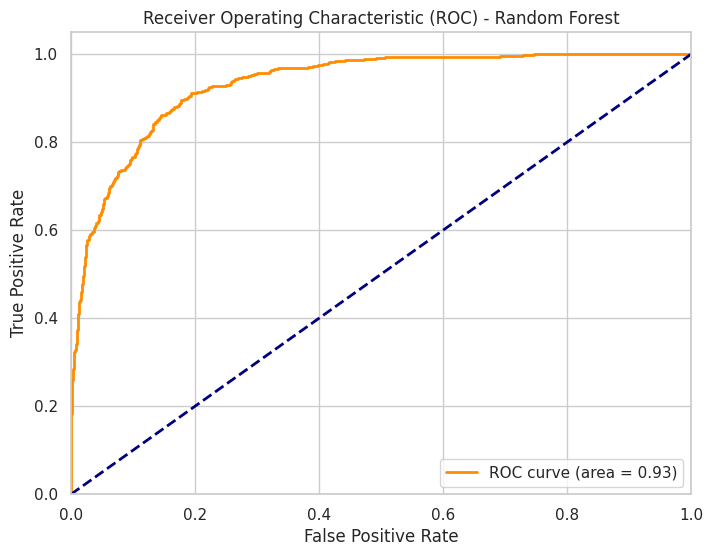

In [ ]:
# ROC Curve for Final Random Forest
y_prob = final_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

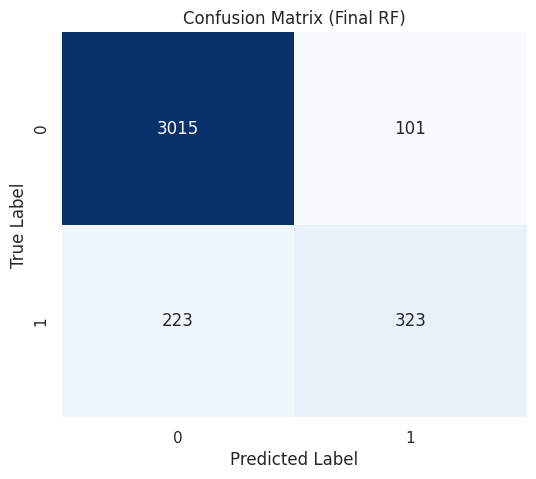

In [ ]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, final_rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Final RF)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 8. Conclusion

### Best Performing Model
The **Random Forest Classifier** generally outperformed Logistic Regression, especially in F1-score, which is crucial for this imbalanced dataset. It handles the non-linear interactions between features like PageValues and ExitRates better.

### Impact of Tuning and Selection
Tuning validated that default Random Forest parameters were already quite effective, but fine-tuning `n_estimators` provided stability. Feature selection highlighted that **PageValues** is the single most predictive feature for purchase intention, aligning with business logic (users completing a transaction visit valuable pages).

### Insights & Future Improvements
- **Seasonality**: November is a key month for sales. Marketing efforts should focus here.
- **Page Optimization**: Reducing exit rates on product pages is critical.